In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import itertools
plt.style.use('fivethirtyeight')
import statsmodels.api as sm
import matplotlib
matplotlib.rcParams['axes.labelsize'] = 14
matplotlib.rcParams['xtick.labelsize'] = 12
matplotlib.rcParams['ytick.labelsize'] = 12
matplotlib.rcParams['text.color'] = 'k'
import warnings
warnings.filterwarnings = ('ignore')


In [2]:
df = pd.read_csv("monatszahlenjuni2021monatszahlen2106verkehrsunfaelle.csv",)
df

,MONATSZAHL,AUSPRAEGUNG,JAHR,MONAT,WERT,VORJAHRESWERT,VERAEND_VORMONAT_PROZENT,VERAEND_VORJAHRESMONAT_PROZENT,ZWOELF_MONATE_MITTELWERT
0,Alkoholunfälle,insgesamt,2021,202101,NaN,28.0,NaN,NaN,NaN
1,Alkoholunfälle,insgesamt,2021,202102,NaN,40.0,NaN,NaN,NaN
2,Alkoholunfälle,insgesamt,2021,202103,NaN,27.0,NaN,NaN,NaN
3,Alkoholunfälle,insgesamt,2021,202104,NaN,26.0,NaN,NaN,NaN
4,Alkoholunfälle,insgesamt,2021,202105,NaN,40.0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
1990,Verkehrsunfälle,Verletzte und Getötete,2000,200008,647.0,NaN,-13.04,NaN,584.0
1991,Verkehrsunfälle,Verletzte und Getötete,2000,200009,675.0,NaN,4.33,NaN,594.0
1992,Verkehrsunfälle,Verletzte und Getötete,2000,200010,615.0,NaN,-8.89,NaN,596.0
1993,Verkehrsunfälle,Verletzte und Getötete,2000,200011,578.0,NaN,-6.02,NaN,594.0


# data preprocessing

In [3]:
# adding a column with date time to the dataframe
n= 4
new_dates = []
for row in df['MONAT']:
    x = [row[i:i+n] for i in range(0, len(row), n)]
    new_dates.append(x[0] + '-'+ x[1])
    
df['new_monat'] = new_dates

In [4]:
df.head()

,MONATSZAHL,AUSPRAEGUNG,JAHR,MONAT,WERT,VORJAHRESWERT,VERAEND_VORMONAT_PROZENT,VERAEND_VORJAHRESMONAT_PROZENT,ZWOELF_MONATE_MITTELWERT,new_monat
0,Alkoholunfälle,insgesamt,2021,202101,NaN,28.0,NaN,NaN,NaN,2021-01
1,Alkoholunfälle,insgesamt,2021,202102,NaN,40.0,NaN,NaN,NaN,2021-02
2,Alkoholunfälle,insgesamt,2021,202103,NaN,27.0,NaN,NaN,NaN,2021-03
3,Alkoholunfälle,insgesamt,2021,202104,NaN,26.0,NaN,NaN,NaN,2021-04
4,Alkoholunfälle,insgesamt,2021,202105,NaN,40.0,NaN,NaN,NaN,2021-05


In [5]:
df['new_monat']

0       2021-01
1       2021-02
2       2021-03
3       2021-04
4       2021-05
         ...   
1990    2000-08
1991    2000-09
1992    2000-10
1993    2000-11
1994    2000-12
Name: new_monat, Length: 1995, dtype: object

In [6]:
# droping all the missing values in the dataframe
df.dropna(inplace = True)
df

,MONATSZAHL,AUSPRAEGUNG,JAHR,MONAT,WERT,VORJAHRESWERT,VERAEND_VORMONAT_PROZENT,VERAEND_VORJAHRESMONAT_PROZENT,ZWOELF_MONATE_MITTELWERT,new_monat
13,Alkoholunfälle,insgesamt,2020,202001,28.0,22.0,-20.00,27.27,37.0,2020-01
14,Alkoholunfälle,insgesamt,2020,202002,40.0,28.0,42.86,42.86,38.0,2020-02
15,Alkoholunfälle,insgesamt,2020,202003,27.0,34.0,-32.50,-20.59,37.0,2020-03
16,Alkoholunfälle,insgesamt,2020,202004,26.0,36.0,-3.70,-27.78,36.0,2020-04
17,Alkoholunfälle,insgesamt,2020,202005,40.0,39.0,53.85,2.56,36.0,2020-05
...,...,...,...,...,...,...,...,...,...,...
1977,Verkehrsunfälle,Verletzte und Getötete,2001,200108,600.0,647.0,-34.85,-7.26,617.0,2001-08
1978,Verkehrsunfälle,Verletzte und Getötete,2001,200109,643.0,675.0,7.17,-4.74,614.0,2001-09
1979,Verkehrsunfälle,Verletzte und Getötete,2001,200110,717.0,615.0,11.51,16.59,623.0,2001-10
1980,Verkehrsunfälle,Verletzte und Getötete,2001,200111,568.0,578.0,-20.78,-1.73,622.0,2001-11


In [7]:
# checking for missing values
df.isna().sum()

MONATSZAHL                        0
AUSPRAEGUNG                       0
JAHR                              0
MONAT                             0
WERT                              0
VORJAHRESWERT                     0
VERAEND_VORMONAT_PROZENT          0
VERAEND_VORJAHRESMONAT_PROZENT    0
ZWOELF_MONATE_MITTELWERT          0
new_monat                         0
dtype: int64

In [8]:
# removing text data from MONAT
df.drop(df[df['MONAT'] == 'Summe'].index, inplace = True)
df

,MONATSZAHL,AUSPRAEGUNG,JAHR,MONAT,WERT,VORJAHRESWERT,VERAEND_VORMONAT_PROZENT,VERAEND_VORJAHRESMONAT_PROZENT,ZWOELF_MONATE_MITTELWERT,new_monat
13,Alkoholunfälle,insgesamt,2020,202001,28.0,22.0,-20.00,27.27,37.0,2020-01
14,Alkoholunfälle,insgesamt,2020,202002,40.0,28.0,42.86,42.86,38.0,2020-02
15,Alkoholunfälle,insgesamt,2020,202003,27.0,34.0,-32.50,-20.59,37.0,2020-03
16,Alkoholunfälle,insgesamt,2020,202004,26.0,36.0,-3.70,-27.78,36.0,2020-04
17,Alkoholunfälle,insgesamt,2020,202005,40.0,39.0,53.85,2.56,36.0,2020-05
...,...,...,...,...,...,...,...,...,...,...
1977,Verkehrsunfälle,Verletzte und Getötete,2001,200108,600.0,647.0,-34.85,-7.26,617.0,2001-08
1978,Verkehrsunfälle,Verletzte und Getötete,2001,200109,643.0,675.0,7.17,-4.74,614.0,2001-09
1979,Verkehrsunfälle,Verletzte und Getötete,2001,200110,717.0,615.0,11.51,16.59,623.0,2001-10
1980,Verkehrsunfälle,Verletzte und Getötete,2001,200111,568.0,578.0,-20.78,-1.73,622.0,2001-11


In [9]:
df['new_monat']= pd.to_datetime(df['new_monat'])

In [10]:
df['new_monat']= pd.to_datetime(df['new_monat'].dt.strftime('%m-%Y'))

In [11]:
df['new_monat']

13     2020-01-01
14     2020-02-01
15     2020-03-01
16     2020-04-01
17     2020-05-01
          ...    
1977   2001-08-01
1978   2001-09-01
1979   2001-10-01
1980   2001-11-01
1981   2001-12-01
Name: new_monat, Length: 1678, dtype: datetime64[ns]

In [12]:
# extracting only Alkoholunfälle category from the column MONATSZAHL
al = df.loc[df['MONATSZAHL'] == 'Alkoholunfälle']
al

,MONATSZAHL,AUSPRAEGUNG,JAHR,MONAT,WERT,VORJAHRESWERT,VERAEND_VORMONAT_PROZENT,VERAEND_VORJAHRESMONAT_PROZENT,ZWOELF_MONATE_MITTELWERT,new_monat
13,Alkoholunfälle,insgesamt,2020,202001,28.0,22.0,-20.00,27.27,37.0,2020-01-01
14,Alkoholunfälle,insgesamt,2020,202002,40.0,28.0,42.86,42.86,38.0,2020-02-01
15,Alkoholunfälle,insgesamt,2020,202003,27.0,34.0,-32.50,-20.59,37.0,2020-03-01
16,Alkoholunfälle,insgesamt,2020,202004,26.0,36.0,-3.70,-27.78,36.0,2020-04-01
17,Alkoholunfälle,insgesamt,2020,202005,40.0,39.0,53.85,2.56,36.0,2020-05-01
...,...,...,...,...,...,...,...,...,...,...
552,Alkoholunfälle,Verletzte und Getötete,2001,200108,21.0,32.0,-40.00,-34.38,32.0,2001-08-01
553,Alkoholunfälle,Verletzte und Getötete,2001,200109,48.0,45.0,128.57,6.67,33.0,2001-09-01
554,Alkoholunfälle,Verletzte und Getötete,2001,200110,37.0,31.0,-22.92,19.35,33.0,2001-10-01
555,Alkoholunfälle,Verletzte und Getötete,2001,200111,25.0,24.0,-32.43,4.17,33.0,2001-11-01


In [13]:
# extracting only insgesamt category from the column AUSPRAEGUNG
category = al.loc[df['AUSPRAEGUNG'] == 'insgesamt']
category.tail()

,MONATSZAHL,AUSPRAEGUNG,JAHR,MONAT,WERT,VORJAHRESWERT,VERAEND_VORMONAT_PROZENT,VERAEND_VORJAHRESMONAT_PROZENT,ZWOELF_MONATE_MITTELWERT,new_monat
267,Alkoholunfälle,insgesamt,2001,200108,60.0,77.0,-15.49,-22.08,71.0,2001-08-01
268,Alkoholunfälle,insgesamt,2001,200109,107.0,84.0,78.33,27.38,73.0,2001-09-01
269,Alkoholunfälle,insgesamt,2001,200110,77.0,83.0,-28.04,-7.23,73.0,2001-10-01
270,Alkoholunfälle,insgesamt,2001,200111,68.0,71.0,-11.69,-4.23,72.0,2001-11-01
271,Alkoholunfälle,insgesamt,2001,200112,66.0,85.0,-2.94,-22.35,71.0,2001-12-01


In [14]:
category.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 240 entries, 13 to 271
Data columns (total 10 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   MONATSZAHL                      240 non-null    object        
 1   AUSPRAEGUNG                     240 non-null    object        
 2   JAHR                            240 non-null    int64         
 3   MONAT                           240 non-null    object        
 4   WERT                            240 non-null    float64       
 5   VORJAHRESWERT                   240 non-null    float64       
 6   VERAEND_VORMONAT_PROZENT        240 non-null    float64       
 7   VERAEND_VORJAHRESMONAT_PROZENT  240 non-null    float64       
 8   ZWOELF_MONATE_MITTELWERT        240 non-null    float64       
 9   new_monat                       240 non-null    datetime64[ns]
dtypes: datetime64[ns](1), float64(5), int64(1), object(3)
memory usage: 20.6+

# visualising the number of accident per category in column 1 

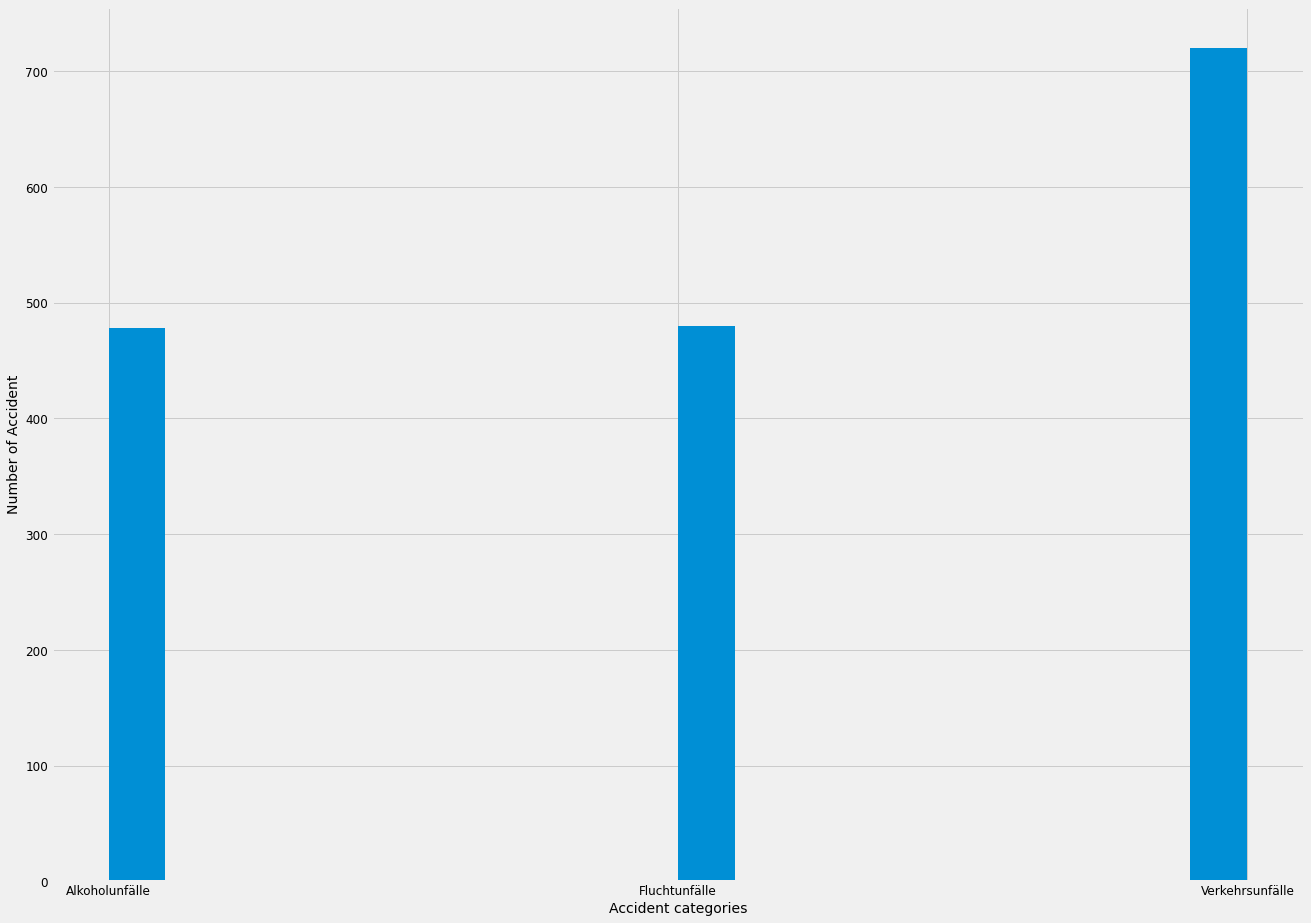

In [15]:
ax = df["MONATSZAHL"].hist(bins = 20, figsize = (20, 15))
ax.set_xlabel('Accident categories')
ax.set_ylabel('Number of Accident')
plt.show()

In [16]:
# there are 19 years in the preprocessed dataset
category['new_monat'].min(), category['new_monat'].max()

(Timestamp('2001-01-01 00:00:00'), Timestamp('2020-12-01 00:00:00'))

In [17]:
# removing the columns we do not need for the forcasting model
cols = ['VORJAHRESWERT', 'VERAEND_VORMONAT_PROZENT', 'VERAEND_VORJAHRESMONAT_PROZENT', 'ZWOELF_MONATE_MITTELWERT' ]
category.drop(cols, axis = 1, inplace = True)
category

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\frame.py:4163: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


,MONATSZAHL,AUSPRAEGUNG,JAHR,MONAT,WERT,new_monat
13,Alkoholunfälle,insgesamt,2020,202001,28.0,2020-01-01
14,Alkoholunfälle,insgesamt,2020,202002,40.0,2020-02-01
15,Alkoholunfälle,insgesamt,2020,202003,27.0,2020-03-01
16,Alkoholunfälle,insgesamt,2020,202004,26.0,2020-04-01
17,Alkoholunfälle,insgesamt,2020,202005,40.0,2020-05-01
...,...,...,...,...,...,...
267,Alkoholunfälle,insgesamt,2001,200108,60.0,2001-08-01
268,Alkoholunfälle,insgesamt,2001,200109,107.0,2001-09-01
269,Alkoholunfälle,insgesamt,2001,200110,77.0,2001-10-01
270,Alkoholunfälle,insgesamt,2001,200111,68.0,2001-11-01


In [18]:
category.sort_values('new_monat')

,MONATSZAHL,AUSPRAEGUNG,JAHR,MONAT,WERT,new_monat
260,Alkoholunfälle,insgesamt,2001,200101,66.0,2001-01-01
261,Alkoholunfälle,insgesamt,2001,200102,49.0,2001-02-01
262,Alkoholunfälle,insgesamt,2001,200103,63.0,2001-03-01
263,Alkoholunfälle,insgesamt,2001,200104,68.0,2001-04-01
264,Alkoholunfälle,insgesamt,2001,200105,85.0,2001-05-01
...,...,...,...,...,...,...
20,Alkoholunfälle,insgesamt,2020,202008,46.0,2020-08-01
21,Alkoholunfälle,insgesamt,2020,202009,46.0,2020-09-01
22,Alkoholunfälle,insgesamt,2020,202010,34.0,2020-10-01
23,Alkoholunfälle,insgesamt,2020,202011,23.0,2020-11-01


In [19]:
# indexing with time series data
category = category.set_index('new_monat')
category.index

DatetimeIndex(['2020-01-01', '2020-02-01', '2020-03-01', '2020-04-01',
               '2020-05-01', '2020-06-01', '2020-07-01', '2020-08-01',
               '2020-09-01', '2020-10-01',
               ...
               '2001-03-01', '2001-04-01', '2001-05-01', '2001-06-01',
               '2001-07-01', '2001-08-01', '2001-09-01', '2001-10-01',
               '2001-11-01', '2001-12-01'],
              dtype='datetime64[ns]', name='new_monat', length=240, freq=None)

In [20]:
# using average daily accident due to alcohol value for the months using the start of each month as the timestamp.
y = category['WERT'].resample('MS').mean()


In [21]:
# 2020  accident due to alcohol value data
y['2020':]

new_monat
2020-01-01    28.0
2020-02-01    40.0
2020-03-01    27.0
2020-04-01    26.0
2020-05-01    40.0
2020-06-01    49.0
2020-07-01    58.0
2020-08-01    46.0
2020-09-01    46.0
2020-10-01    34.0
2020-11-01    23.0
2020-12-01    13.0
Freq: MS, Name: WERT, dtype: float64

# Visualizing Accident due to Alcohol Time Series Data

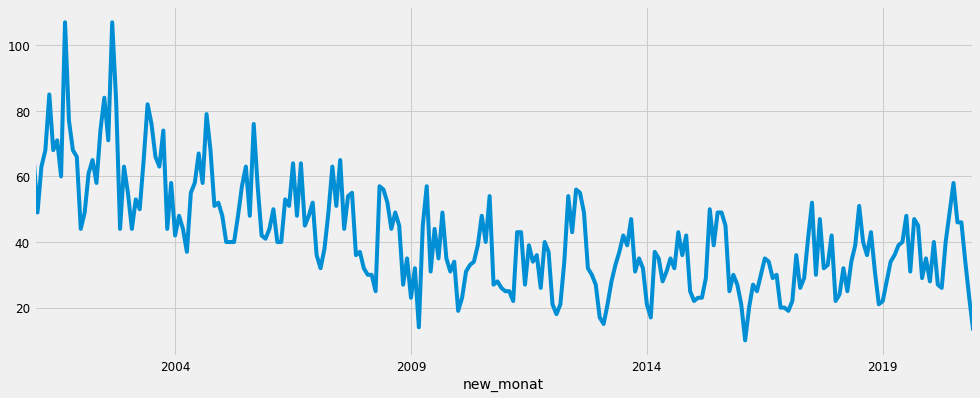

In [22]:
y.plot(figsize = (15, 6))
plt.show()

# Visualizing the data using Time Series Decomposition  method
this allow us to decompose our time series into three components: trend, seasonality and noise

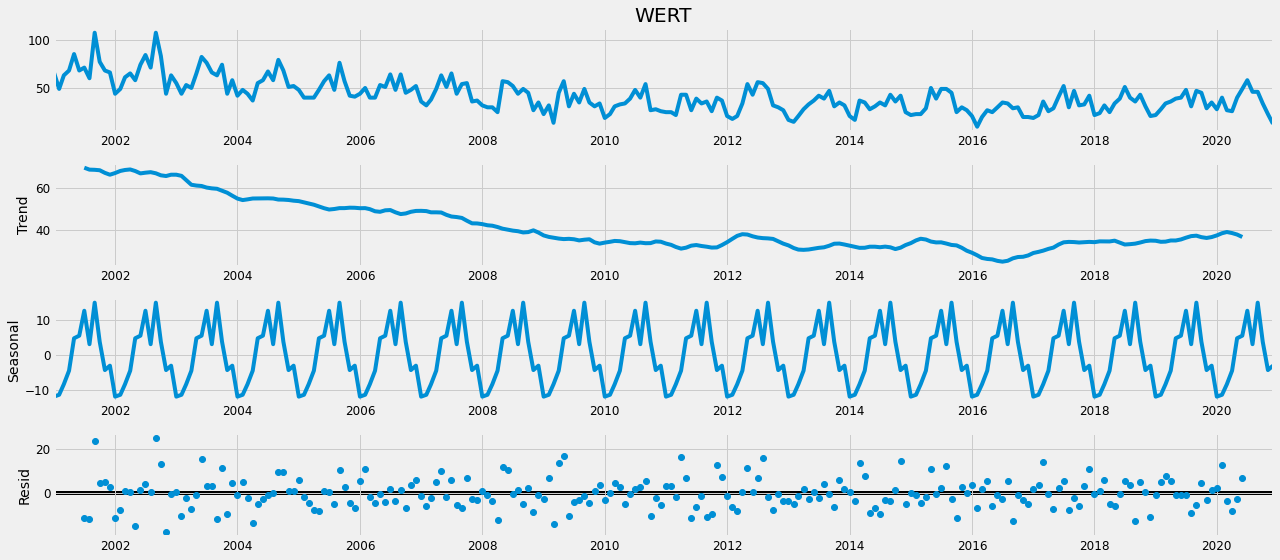

In [23]:
from pylab import rcParams
rcParams['figure.figsize']= 18, 8
decomposition = sm.tsa.seasonal_decompose(y, model = 'additive')
fig = decomposition.plot()
plt.show()

# Time Series Forcasting with ARIMA
the three arima model denoted with p, d and q  accounts for seasonality, trend and noise in the data

In [24]:
p = d = q = range(0, 2)
pdq = list(itertools.product(p, d, q))
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]
print ('Examples of parameter combinations for Seasonal ARIMA...')
print('SARIMAX: {} x {}'.format(pdq[1],
      seasonal_pdq[1]))
print('SARIMAX: {} x {}'.format(pdq[2],
     seasonal_pdq[2]))
print('SARIMAX: {} x {}'.format(pdq[3],
     seasonal_pdq[3]))
print('SARIMAX: {} x {}'.format(pdq[4],
     seasonal_pdq[4]))

Examples of parameter combinations for Seasonal ARIMA...
SARIMAX: (0, 0, 1) x (0, 0, 1, 12)
SARIMAX: (0, 1, 0) x (0, 1, 0, 12)
SARIMAX: (0, 1, 1) x (0, 1, 1, 12)
SARIMAX: (1, 0, 0) x (1, 0, 0, 12)


In [25]:
for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(y, order = param, seasonal_order = param_seasonal,
enforce_stationary = False, enforce_invertibility = False)
            results = mod.fit()
            
            print('ARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, results.aic))
            
        except:
            continue

ARIMA(0, 0, 0)x(0, 0, 0, 12)12 - AIC:2512.095008302171
ARIMA(0, 0, 0)x(0, 0, 1, 12)12 - AIC:2288.841999018694
ARIMA(0, 0, 0)x(0, 1, 0, 12)12 - AIC:1723.4026777051365
ARIMA(0, 0, 0)x(0, 1, 1, 12)12 - AIC:1689.0512762158019
ARIMA(0, 0, 0)x(1, 0, 0, 12)12 - AIC:1853.9156846336214
ARIMA(0, 0, 0)x(1, 0, 1, 12)12 - AIC:1820.5630984909767
ARIMA(0, 0, 0)x(1, 1, 0, 12)12 - AIC:1683.309467650829
ARIMA(0, 0, 0)x(1, 1, 1, 12)12 - AIC:1684.7386979587222
ARIMA(0, 0, 1)x(0, 0, 0, 12)12 - AIC:2283.694558591406
ARIMA(0, 0, 1)x(0, 0, 1, 12)12 - AIC:2121.347054879586
ARIMA(0, 0, 1)x(0, 1, 0, 12)12 - AIC:1710.0073757044338
ARIMA(0, 0, 1)x(0, 1, 1, 12)12 - AIC:1665.1696278714483
ARIMA(0, 0, 1)x(1, 0, 0, 12)12 - AIC:1833.4321123476188
ARIMA(0, 0, 1)x(1, 0, 1, 12)12 - AIC:1789.4783751089851
ARIMA(0, 0, 1)x(1, 1, 0, 12)12 - AIC:1664.5074583064375
ARIMA(0, 0, 1)x(1, 1, 1, 12)12 - AIC:1662.9661221898837
ARIMA(0, 1, 0)x(0, 0, 0, 12)12 - AIC:1875.30823425997
ARIMA(0, 1, 0)x(0, 0, 1, 12)12 - AIC:1848.1021268112172

# fitting the ARIMA model
the above output suggests that SARIMAX(1, 1, 1)x(1, 1, 1, 12) yields the lowest AIC value of 1611.4499714685287 there for it is considered to be the optimal option.
 The summary attribute table from the result of SARIMAX return significant amount of information. The coef column shows the weight(i.e importance) of each features and it impact on the time series,  the p>|z| column informs us of the significance of each feature weight,  Here, each weight has a p-value lower or close to to 0.05 therefore it is reasonable to retain all of them in the model 

In [26]:
mod = sm.tsa.statespace.SARIMAX(y, order = (1, 1, 1), seasonal_order = (1, 1, 1, 12), enforce_stationarity = False, enforce_invertibility = False)
results = mod.fit()
print(results.summary().tables[1])

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.1784      0.081      2.208      0.027       0.020       0.337
ma.L1         -0.9205      0.037    -24.867      0.000      -0.993      -0.848
ar.S.L12      -0.2277      0.093     -2.450      0.014      -0.410      -0.046
ma.S.L12      -0.5693      0.077     -7.406      0.000      -0.720      -0.419
sigma2        61.7921      4.997     12.366      0.000      51.999      71.585


# ploting model diagnostics 
this is used for investigating  any unusual behaviour to ensure that 

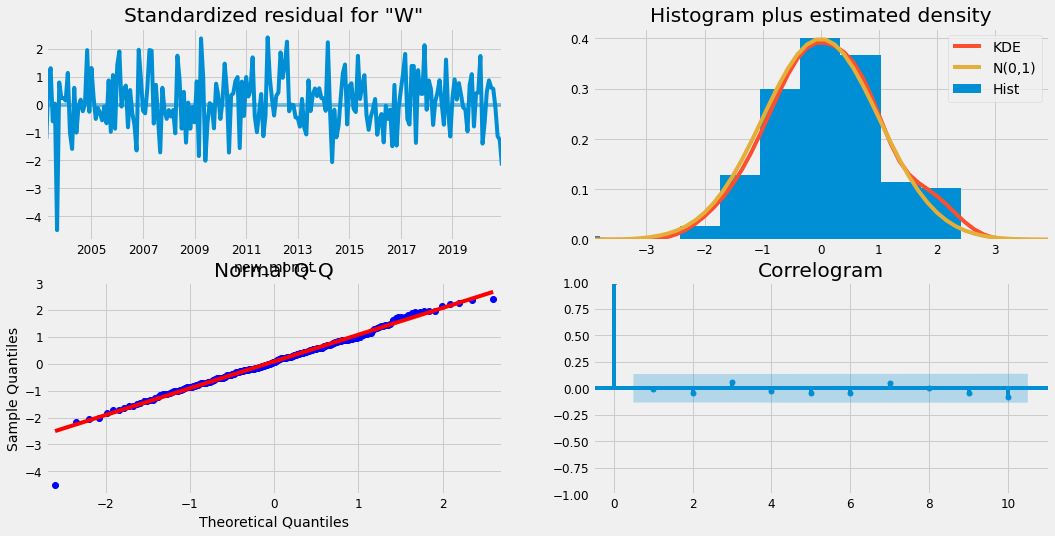

In [27]:
results.plot_diagnostics(figsize = (16, 8))
plt.show()

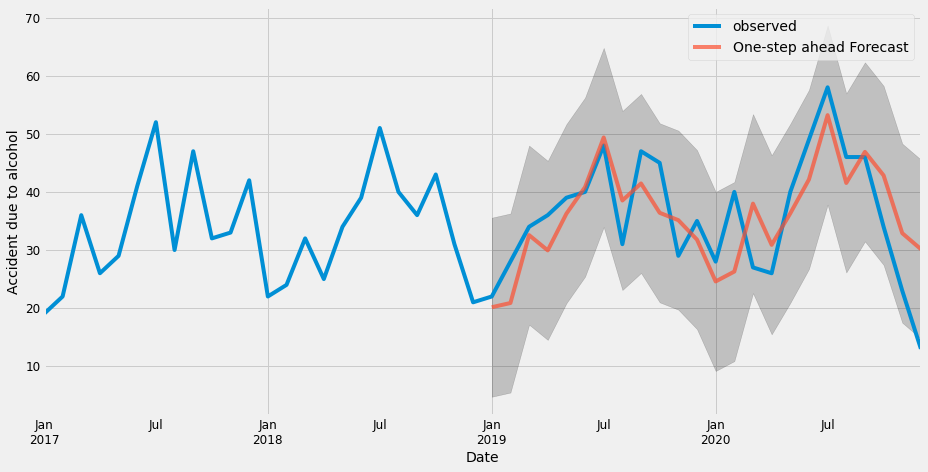

In [28]:
pred = results.get_prediction(start = pd.to_datetime('2019-01-01'), dynamic = False)
pred_ci = pred.conf_int()

ax = y['2017':].plot(label = 'observed')
pred.predicted_mean.plot(ax = ax, label = 'One-step ahead Forecast', alpha = .7, figsize = (14,7))
ax.fill_between(pred_ci.index, pred_ci.iloc[:,0], pred_ci.iloc[:, 1], color = 'k', alpha = .2)
ax.set_xlabel('Date')
ax.set_ylabel('Accident due to alcohol')
plt.legend()
plt.show()

In [29]:
y_forecasted = pred.predicted_mean
y_truth = y['2019-01-01']
mse = ((y_forecasted - y_truth)**2).mean()
print('The Mean Squared Error of our forecasts is {}'.format(round(mse, 2)))

The Mean Squared Error of our forecasts is 257.4


In [30]:
print('The Root Mean Squared Error of our forecasts is {}'.format(round(np.sqrt(mse), 2)))

The Root Mean Squared Error of our forecasts is 16.04


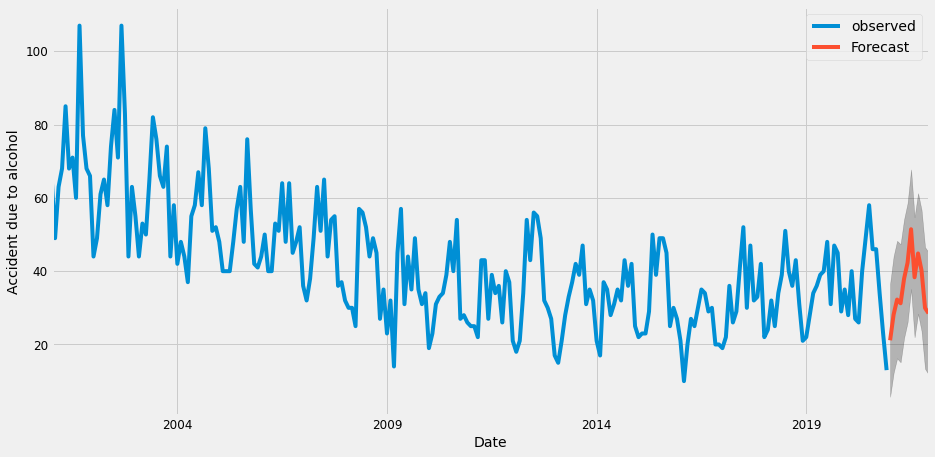

In [31]:
pred_uc = results.get_forecast(steps = 12)
pred_ci = pred_uc.conf_int()
ax = y.plot(label = 'observed', figsize = (14, 7))
pred_uc.predicted_mean.plot(ax=ax, label = 'Forecast')
ax.fill_between(pred_ci.index, pred_ci.iloc[:,0], pred_ci.iloc[:, 1], color = 'k', alpha = .25)
ax.set_xlabel('Date')
ax.set_ylabel('Accident due to alcohol')
plt.legend()
plt.show()

In [32]:
pred_ci

,lower WERT,upper WERT
2021-01-01,5.739519,36.553259
2021-02-01,12.227477,44.049629
2021-03-01,16.224219,48.280602
2021-04-01,15.140602,47.350438
2021-05-01,21.778138,54.128359
2021-06-01,26.064405,58.552266
2021-07-01,35.130953,67.755495
2021-08-01,21.958939,54.719525
2021-09-01,28.384635,61.280689
2021-10-01,23.668682,56.699648


In [33]:
 forcasted_WERT = pred_ci['upper WERT'] - pred_ci['lower WERT'] 
forcasted_WERT 

2021-01-01    30.813740
2021-02-01    31.822152
2021-03-01    32.056383
2021-04-01    32.209836
2021-05-01    32.350221
2021-06-01    32.487860
2021-07-01    32.624542
2021-08-01    32.760585
2021-09-01    32.896054
2021-10-01    33.030966
2021-11-01    33.165328
2021-12-01    33.299148
Freq: MS, dtype: float64

In [34]:
jan_pred = pred_ci.iloc[0:1]
jan_pred

,lower WERT,upper WERT
2021-01-01,5.739519,36.553259


In [35]:
 forcasted_WERT_for_2021_01 = jan_pred['upper WERT'] - jan_pred['lower WERT'] 
forcasted_WERT_for_2021_01

2021-01-01    30.81374
Freq: MS, dtype: float64